# Closed-loop testing

In [1]:
%matplotlib inline
from robodev import *

In [2]:
d = Robodev()
d.set_global_velocity(0)

[INFO] [1687737107.077446]: Waiting for base_state to start publishing...
[INFO] [1687737107.108418]: Got first message from base_state, ready!


In [3]:
# Prerequisites
track = d.create_track().add_saw_wave(max_vel=5.0, duration=15.0, periods=3)

def apply_settings(mode: int, p_in: float, i_in: float, d_in: float, bias: float, initial_i: float = 0):
    d.set_global_velocity(0)
    d.set_global_adaptive_state(initial_i)
    d.set_global_control_params(p_in, i_in, d_in, bias, mode)
    result = track.run()
    d.set_global_velocity(0)
    return result

# Simple PI controller

In [4]:
pi = apply_settings(
    mode=1,
    p_in=40,
    i_in=10,
    d_in=0,
    bias=0
)

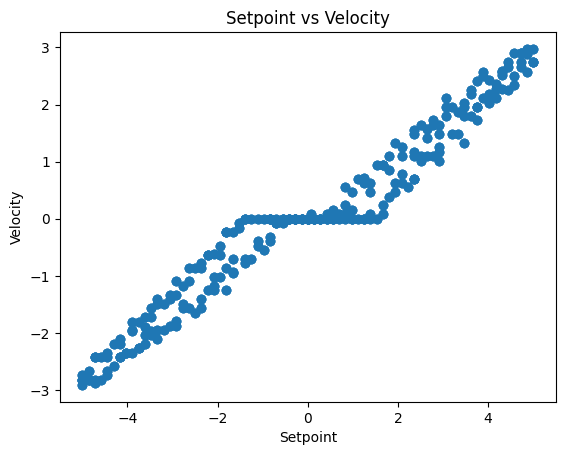

In [5]:
pi.plot_setpoint_v_velocity()

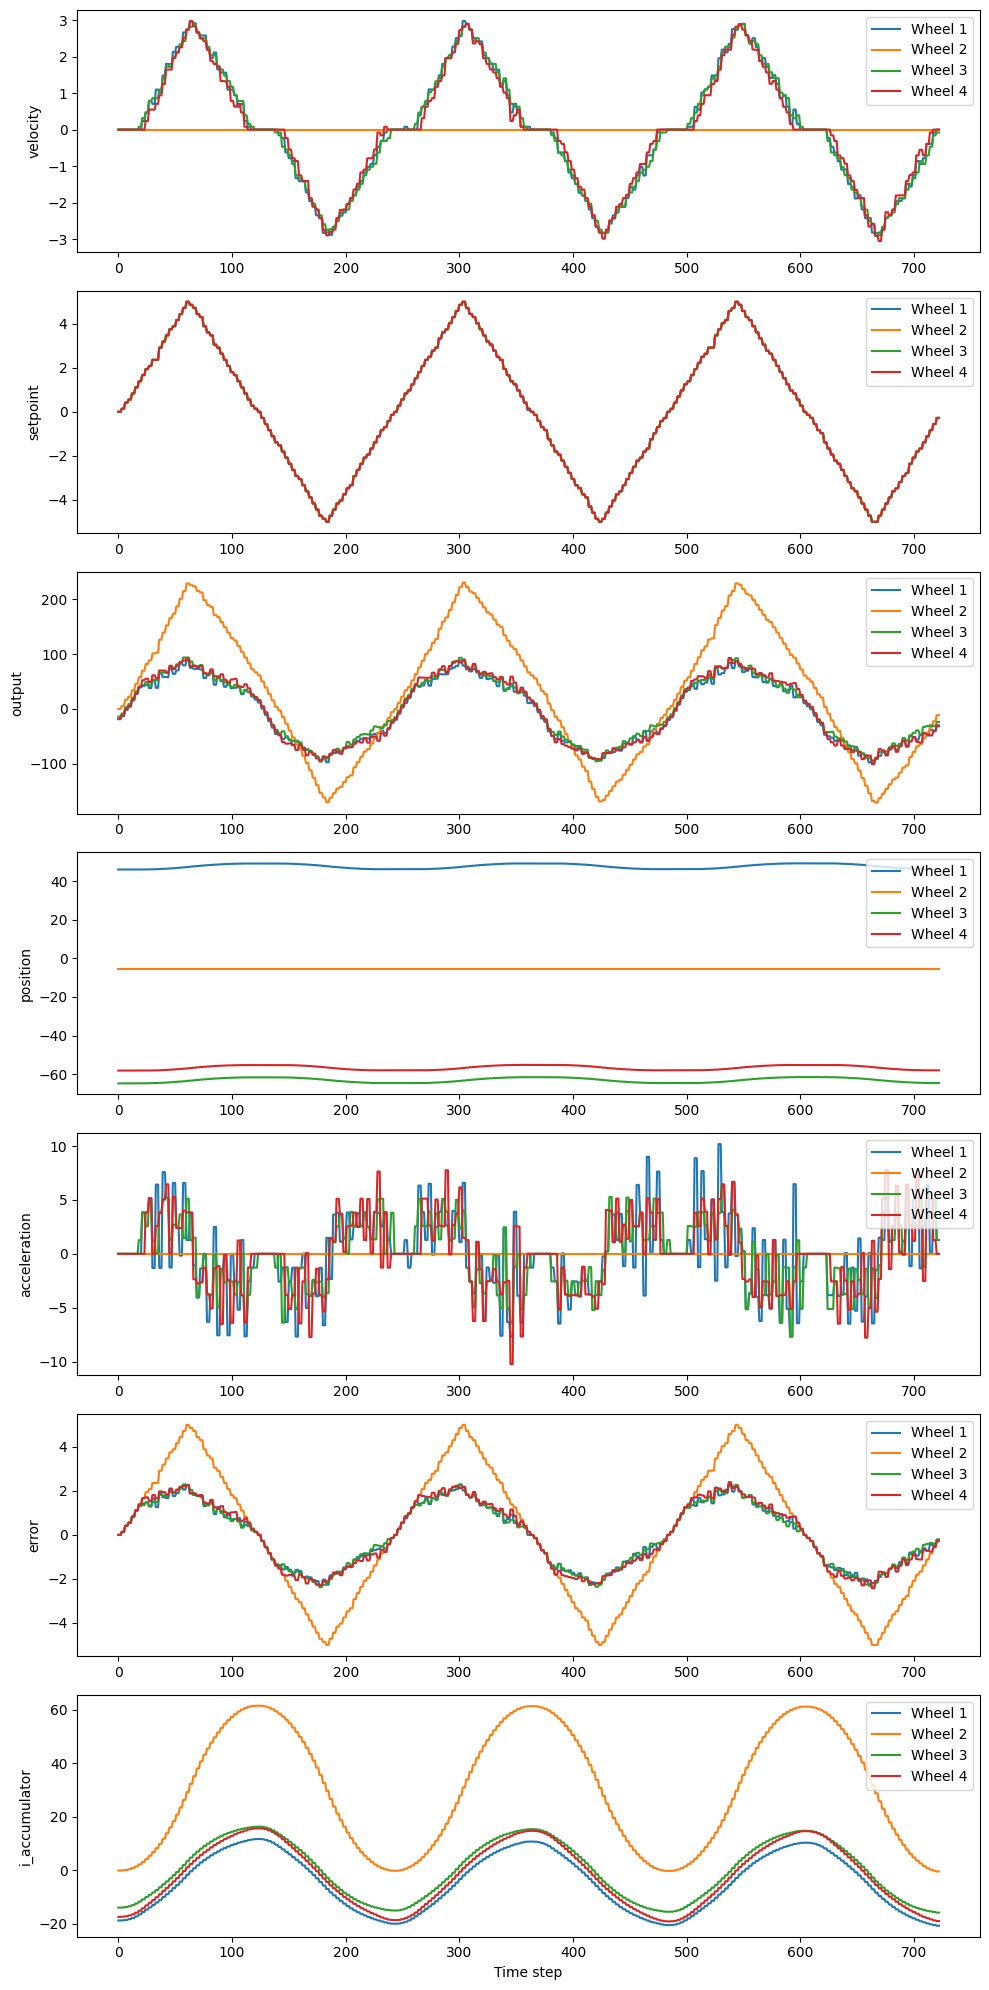

In [6]:
pi.plot_all()

# PI controller with flipping biases and integrals

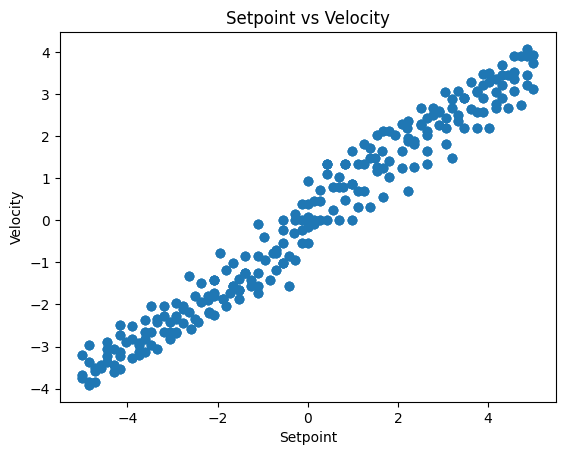

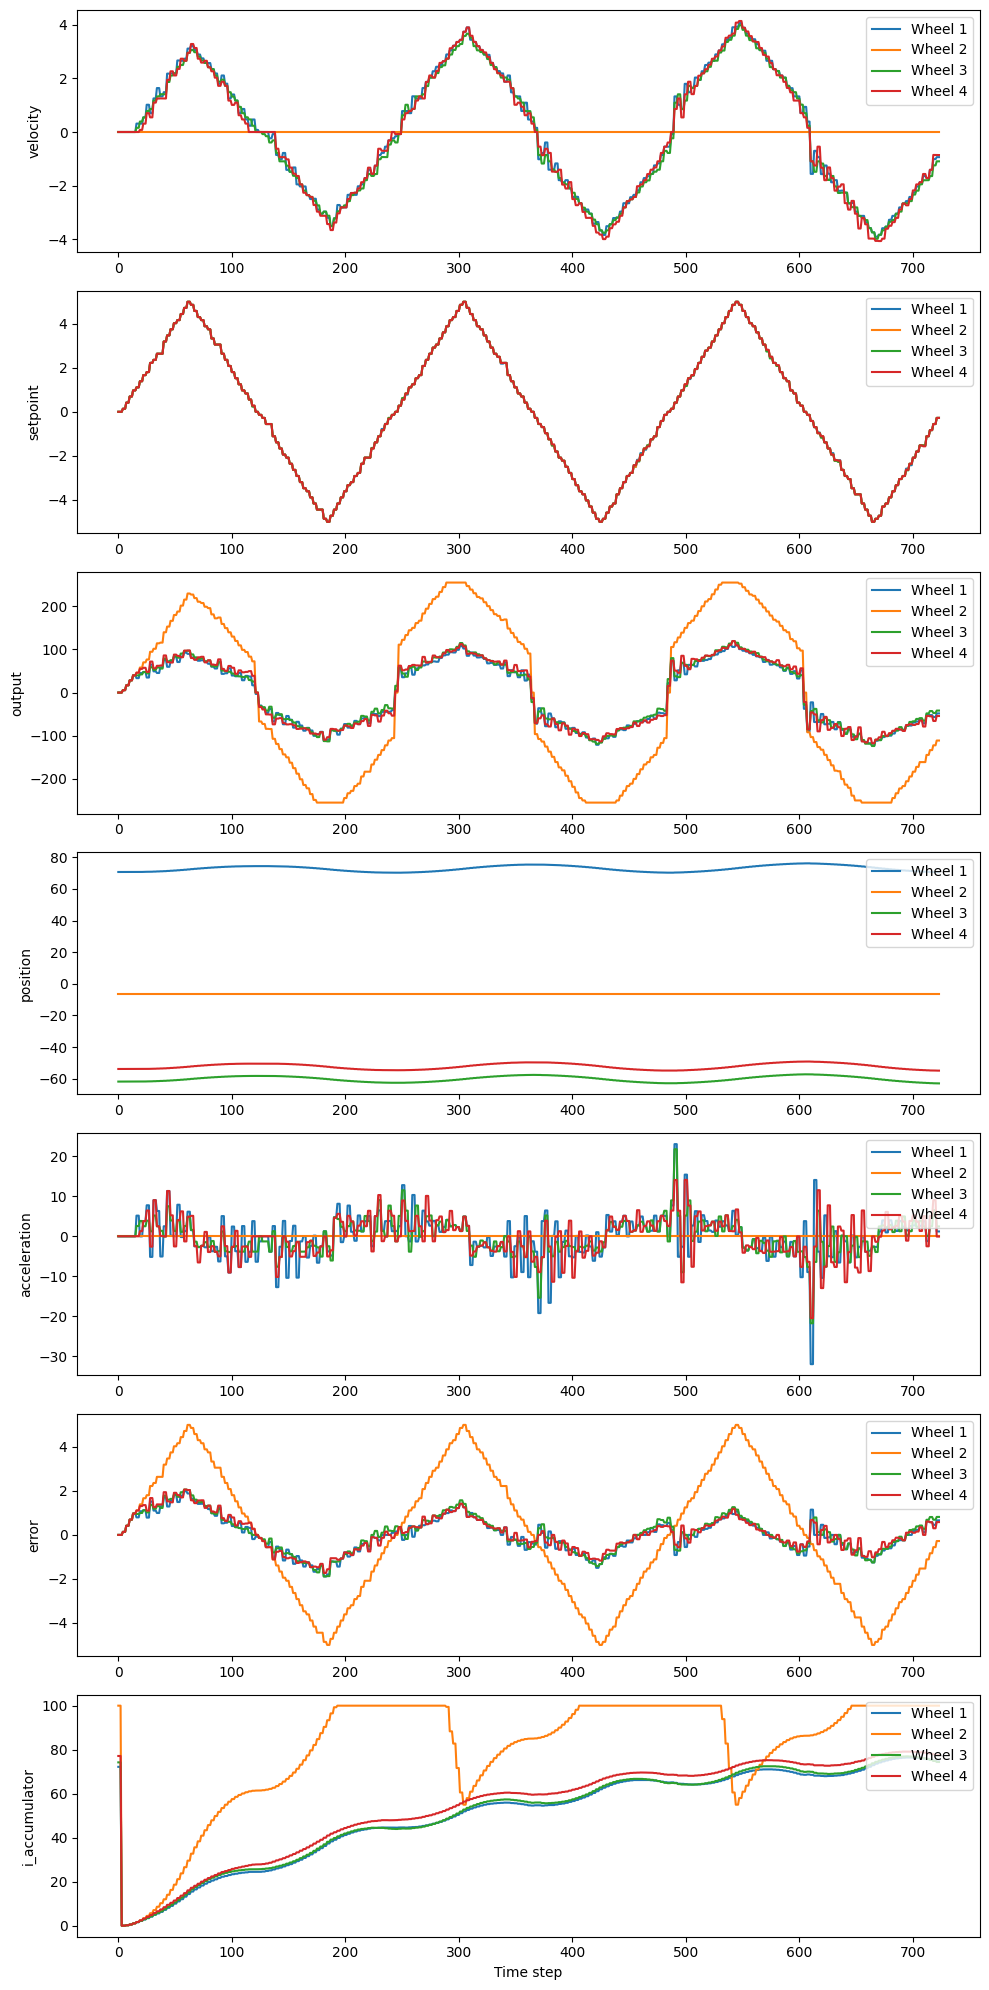

In [16]:
pif = apply_settings(
    mode=2,
    p_in=40,
    i_in=10,
    d_in=0,
    bias=0
)
pif.plot_setpoint_v_velocity()
pif.plot_all()

# Adaptive PID controller

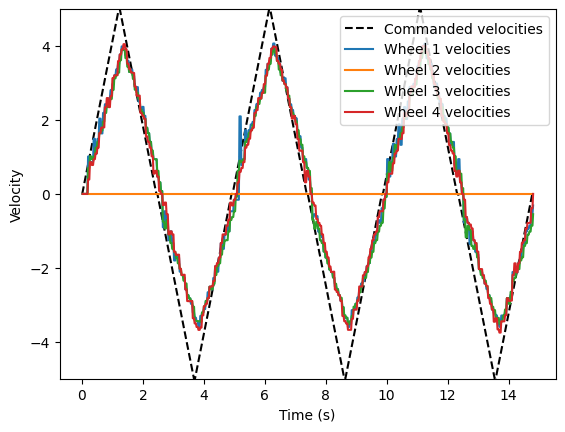

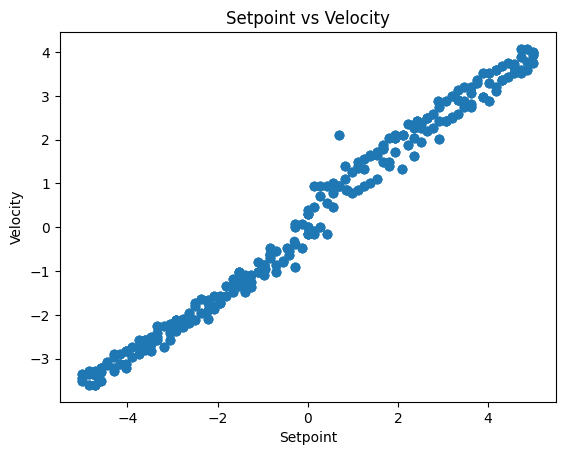

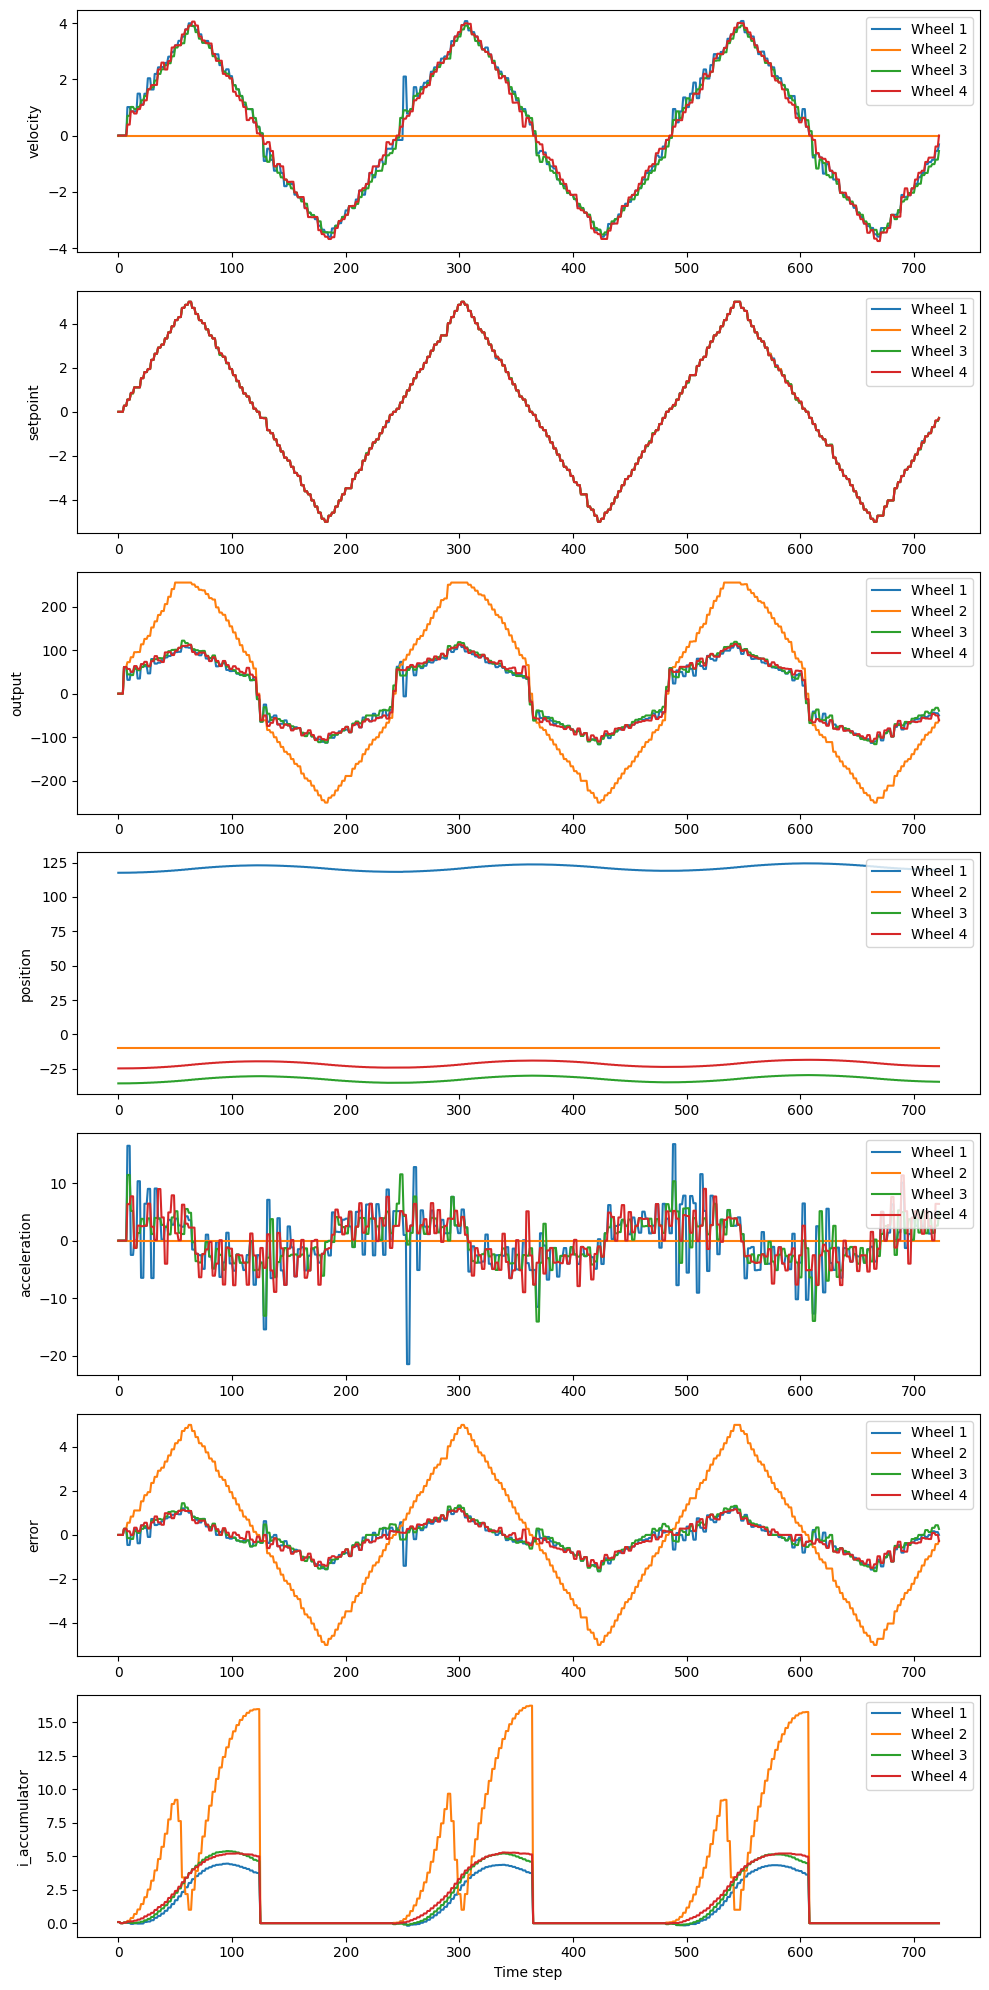

In [21]:
pid = apply_settings(
    mode=3,
    p_in=40,
    i_in=5,
    d_in=0,
    bias=50
)
pid.plot()
pid.plot_setpoint_v_velocity()
pid.plot_all()